In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price = pd.DataFrame()
house_price = house_prices_df[['MSSubClass', 'MSZoning','LotArea','Street','LotShape','Neighborhood','BldgType','GrLivArea',
                               'OverallQual','YearBuilt','RoofStyle', 'HouseStyle' ,'TotalBsmtSF', 'Heating','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','PoolArea', 'YrSold', 'SaleType','SaleCondition','FullBath',
                               'SalePrice']]

In [4]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]

- Split your data into train and test sets.

In [5]:
Y = house_price['SalePrice']
X = house_price[['GrLivArea','YearBuilt', 'TotalBsmtSF', 'GarageCars','Fireplaces']]

In [6]:
X_train , X_test, Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 , random_state = 465)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1168, 5)
(1168,)
(292, 5)
(292,)


- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [8]:
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train , X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     614.1
Date:                Sun, 23 May 2021   Prob (F-statistic):          4.45e-323
Time:                        22:29:18   Log-Likelihood:                -14058.
No. Observations:                1168   AIC:                         2.813e+04
Df Residuals:                    1162   BIC:                         2.816e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.237e+06   9.34e+04    -13.239      0.000   -1.42e+06   -1.05e+06
GrLivArea      64.5516      2.894     22.308      0.000      58.874      70.229
YearBuilt     629.0141     48.364     13.006      0.000     534.123     723.905
TotalBsmtSF    29.4305      3.325      8.851      0.000      22.907      35.954
GarageCars   2.284e+04   2149.289     10.627      0.000    1.86e+04    2.71e+04
Fireplaces   1.271e+04   2141.092      5.935      0.000    8507.076    1.69e+04
==============================================================================
Omnibus:                      407.098   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34137.074
Skew:                          -0.655   Prob(JB):                         0.00
Kurtosis:                      29.452   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.

In [9]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

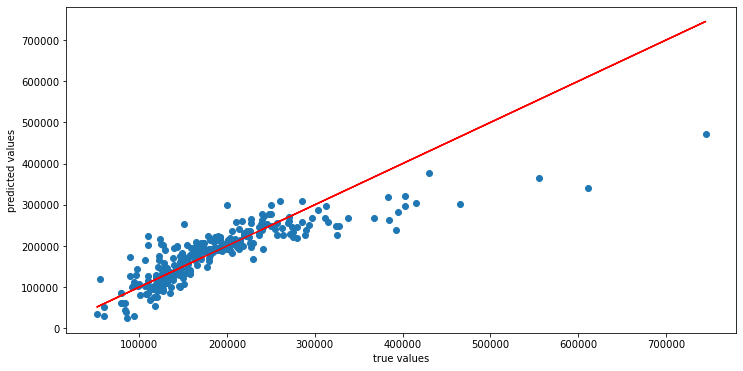

mean absolute error : 28573.387455587865
mean squared error : 2002328519.6062279
root mean squared error : 44747.385617555665
mean absolute percentage error : 16.16617788067695


In [10]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test , y_preds)
plt.plot(Y_test , Y_test , color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

print("mean absolute error : {}".format(mean_absolute_error(Y_test , y_preds)))
print("mean squared error : {}".format(mse(Y_test , y_preds)))
print("root mean squared error : {}".format(rmse(Y_test , y_preds)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))

- Is the performance of your model satisfactory? Why?

In [11]:
print("house price min value : {}".format(house_price['SalePrice'].min()))
print("house price max value : {}".format(house_price['SalePrice'].max()))
print("house price std       : {}".format(house_price['SalePrice'].std()))

house price min value : 34900
house price max value : 755000
house price std       : 79442.50288288663


Ev fiyatlarının 34900 ile 755000 arasında olduğuna göre 44747 standart sapmalı bir tahmin yapmak çok iyidir denemez. Modelin geliştirilmeye ihtiyacı vardır.

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [12]:
Y = house_price['SalePrice']
X = house_price[['GrLivArea','YearBuilt', 'TotalBsmtSF', 'GarageCars','Fireplaces','LotArea','BldgType_num','OverallQual']]

In [13]:
X_train , X_test, Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 , random_state = 465)

In [14]:
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train , X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     524.4
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        22:29:26   Log-Likelihood:                -13919.
No. Observations:                1168   AIC:                         2.786e+04
Df Residuals:                    1159   BIC:                         2.790e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.525e+05   9.25e+04     -9.218      0.000   -1.03e+06   -6.71e+05
GrLivArea       43.6276      2.850     15.309      0.000      38.036      49.219
YearBuilt      400.6311     48.717      8.224      0.000     305.048     496.215
TotalBsmtSF     16.7509      3.067      5.462      0.000      10.734      22.768
GarageCars    1.468e+04   1966.408      7.466      0.000    1.08e+04    1.85e+04
Fireplaces    7962.1121   1937.696      4.109      0.000    4160.328    1.18e+04
LotArea          0.4806      0.108      4.443      0.000       0.268       0.693
BldgType_num -6313.2548   1060.495     -5.953      0.000   -8393.960   -4232.549
OverallQual   2.067e+04   1266.600     16.320      0.000    1.82e+04    2.32e+04
==============================================================================
Omnibus:                      379.163   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40547.453
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                      31.852   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

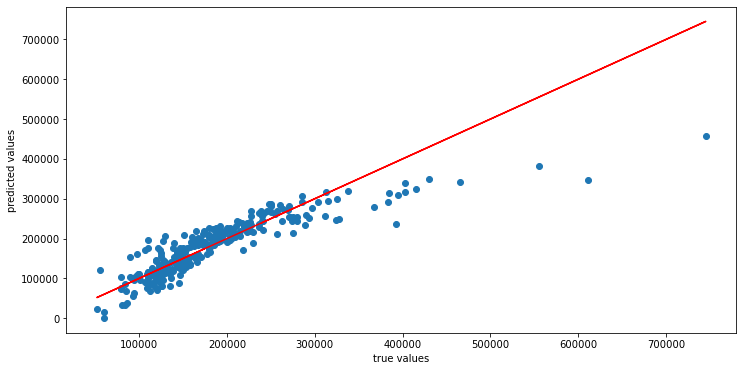

mean absolute error : 26052.763868591697
mean squared error : 1655674991.1155634
root mean squared error : 40689.986373990876
mean absolute percentage error : 15.10660933217744


In [16]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test , y_preds)
plt.plot(Y_test , Y_test , color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

print("mean absolute error : {}".format(mean_absolute_error(Y_test , y_preds)))
print("mean squared error : {}".format(mse(Y_test , y_preds)))
print("root mean squared error : {}".format(rmse(Y_test , y_preds)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))

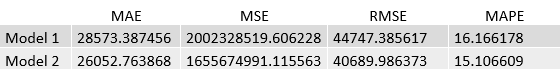

İkinci modelin test kümesi performansı kullandığımız dört metriğin tümüne göre bir öncekinden daha iyidir. Önceki modele kıyasla daha iyi tahmin yapabiliyor.